In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
(train_set_x, train_set_y), (test_set_x, test_set_y) = keras.datasets.mnist.load_data()

In [3]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
test_img = train_set_x[200]
print(test_img.shape)

(28, 28)


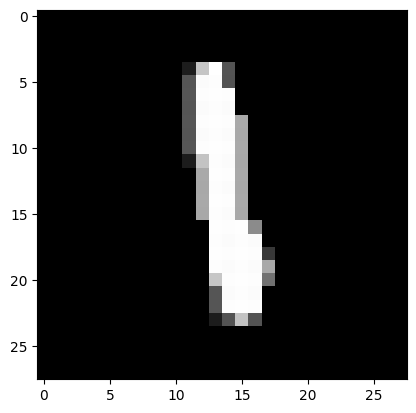

1


In [5]:
plt.imshow(test_img, cmap='gray')
plt.show()
print(train_set_y[200])

In [6]:
test_img.max()

255

In [7]:
train_set_x = train_set_x.astype('float32')/255
test_set_x = test_set_x.astype('float32')/255

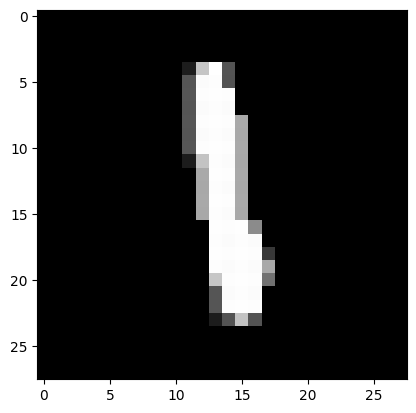

In [8]:
plt.imshow(train_set_x[200], cmap='gray')

In [9]:
train_set_x = np.expand_dims(train_set_x, -1)
test_set_x = np.expand_dims(test_set_x, -1)

In [10]:
print(train_set_x.shape, test_set_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
train_set_y[30]

3

In [12]:
train_set_y = keras.utils.to_categorical(train_set_y, num_classes)
test_set_y = keras.utils.to_categorical(test_set_y, num_classes)

In [13]:
train_set_y[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
input_shape =  (28, 28, 1)

In [15]:
model = keras.Sequential(
    [
    keras.Input(shape = input_shape),
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides=(1, 1)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 500)               3

In [17]:
batch = 512
epoch = 5

In [18]:
model.compile(optimizer = 'Adam', loss="categorical_crossentropy", metrics = ['accuracy'])

In [19]:
hist = model.fit(train_set_x, train_set_y, epochs=epoch, batch_size=batch, validation_split=0.1)

Epoch 1/5
106/106 [==============================] - 259s 2s/step - loss: 0.2720 - accuracy: 0.9172 - val_loss: 0.0615 - val_accuracy: 0.9837
Epoch 2/5
106/106 [==============================] - 255s 2s/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 3/5
106/106 [==============================] - 183s 2s/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0442 - val_accuracy: 0.9880
Epoch 4/5
106/106 [==============================] - 257s 2s/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0388 - val_accuracy: 0.9892
Epoch 5/5
106/106 [==============================] - 262s 2s/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0404 - val_accuracy: 0.9892


In [21]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=b63e6b29f9567b346a8480d5e46b97bac364127ec7868a929f4480d1fceb4f0f
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [22]:
from ann_visualizer.visualize import ann_viz

In [23]:
ann_viz(model, filename='fileyfile.gv')

In [24]:
import graphviz

In [25]:
viz = graphviz.Source.from_file('fileyfile.gv')

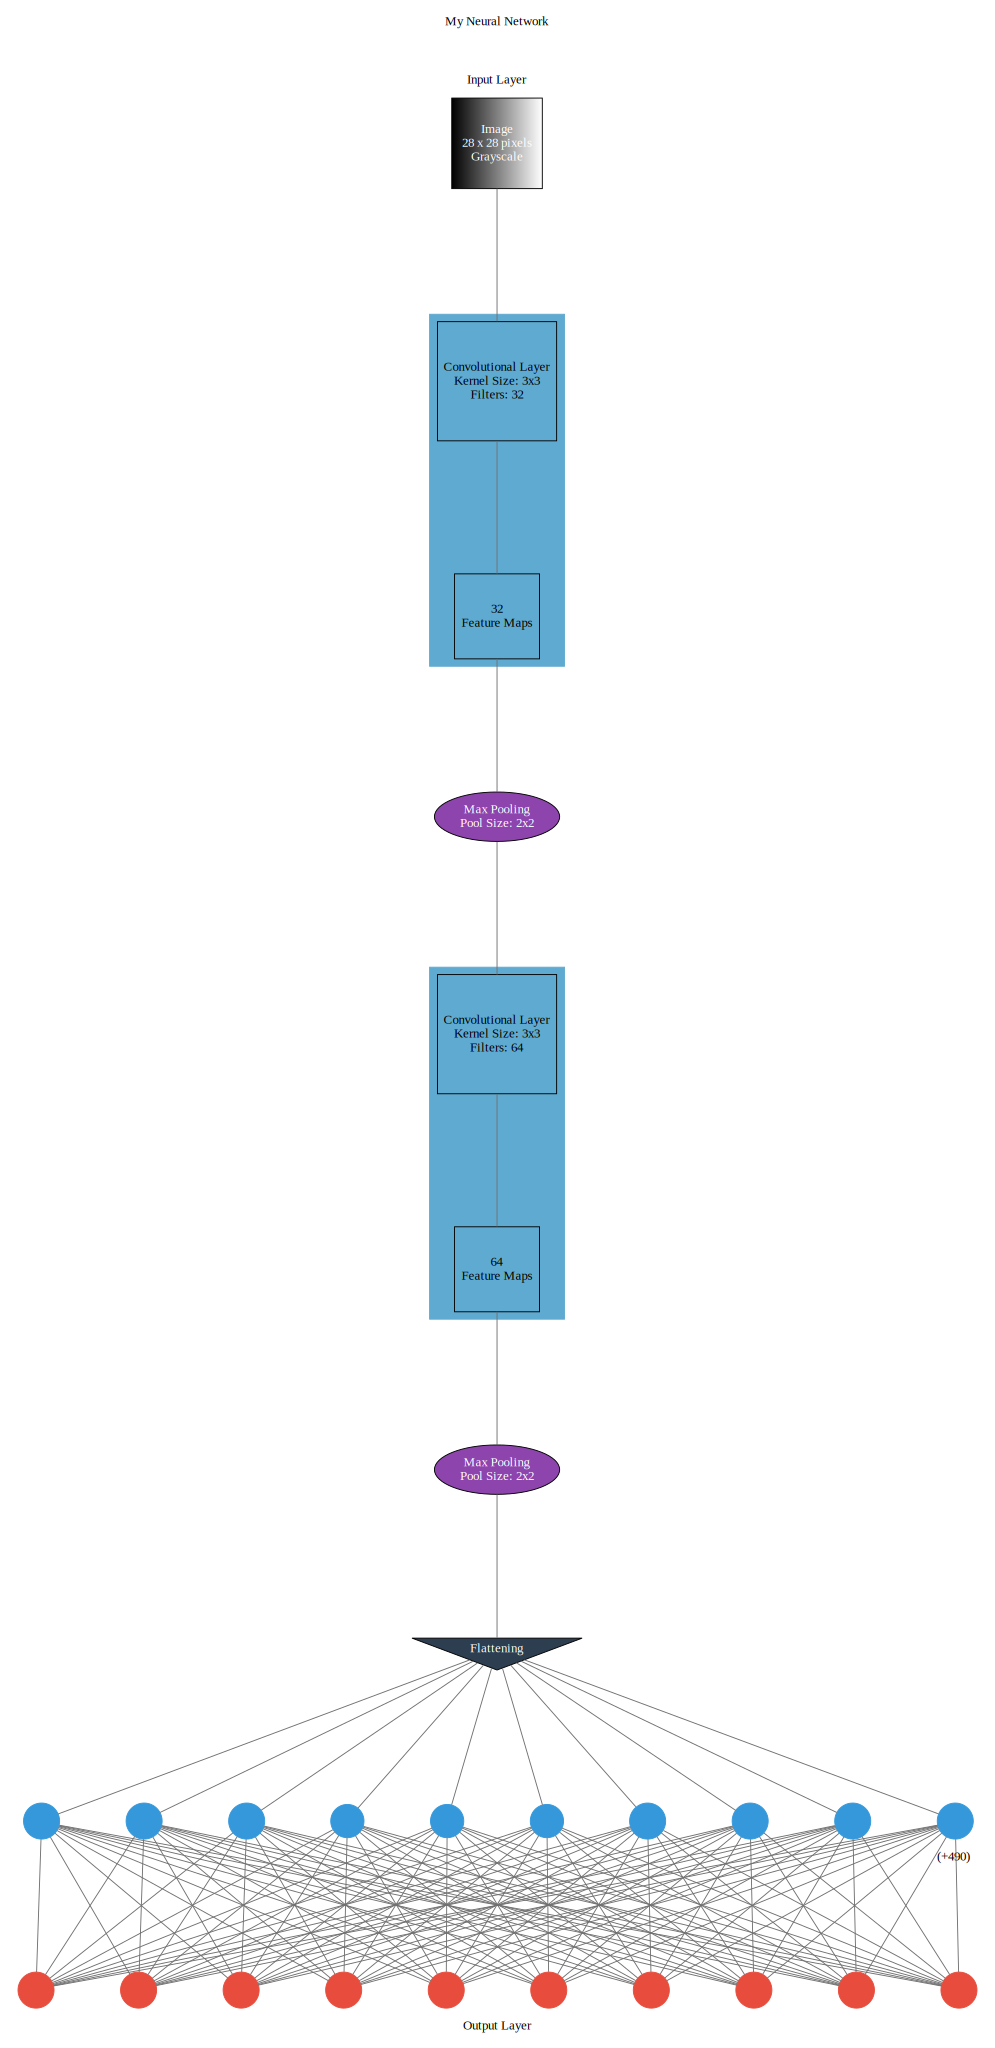

In [26]:
viz

In [27]:
score = model.evaluate(test_set_x, test_set_y, batch_size=512)

20/20 [==============================] - 36s 2s/step - loss: 0.0302 - accuracy: 0.9904


In [28]:
predictions = model.predict(test_set_x)

313/313 [==============================] - 11s 34ms/step


In [29]:
print(np.argmax(predictions[0]))

7


In [31]:
predictions.shape

(10000, 10)